In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

 ## Importing the Dataset 

In [2]:
df = pd.read_csv ("exams.csv")

In [3]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


## Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
headers = ["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"]
for name in headers:
    print (name)
    print (df[name].value_counts())
    print (" ")

gender
male      508
female    492
Name: gender, dtype: int64
 
race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64
 
parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64
 
lunch
standard        660
free/reduced    340
Name: lunch, dtype: int64
 
test preparation course
none         656
completed    344
Name: test preparation course, dtype: int64
 
math score
62    32
74    30
59    29
67    29
68    28
      ..
21     1
25     1
15     1
24     1
27     1
Name: math score, Length: 79, dtype: int64
 
reading score
72    36
77    35
66    34
68    32
69    30
      ..
34     1
30     1
32     1
41     1
37     1
Name: reading score, Length: 71, dtype: int64
 
writing score
78    32
72    32
74    31
70    31
63    29
      ..
28     1
15  

In [6]:
df.drop (["gender", "race/ethnicity", "lunch"], axis = 1, inplace = True)
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score
0,some college,completed,59,70,78
1,associate's degree,none,96,93,87
2,some college,none,57,76,77
3,some college,none,70,70,63
4,associate's degree,none,83,85,86
5,some high school,none,68,57,54
6,associate's degree,none,82,83,80
7,some high school,none,46,61,58
8,some high school,none,80,75,73
9,bachelor's degree,completed,57,69,77


In [7]:
df["average score"] = (df["math score"] + df["reading score"] + df["writing score"])/3
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score,average score
0,some college,completed,59,70,78,69.000000
1,associate's degree,none,96,93,87,92.000000
2,some college,none,57,76,77,70.000000
3,some college,none,70,70,63,67.666667
4,associate's degree,none,83,85,86,84.666667
5,some high school,none,68,57,54,59.666667
6,associate's degree,none,82,83,80,81.666667
7,some high school,none,46,61,58,55.000000
8,some high school,none,80,75,73,76.000000
9,bachelor's degree,completed,57,69,77,67.666667


In [8]:
print (min(df["math score"]))
print (max(df["math score"]))

15
100


In [9]:
# <40 = Fail
bins = np.array ([0,40,100])
bins

array([  0,  40, 100])

In [10]:
names = ["F","P"]
df["math result"] = pd.cut (df["math score"], bins, labels = names, include_lowest = True)
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score,average score,math result
0,some college,completed,59,70,78,69.000000,P
1,associate's degree,none,96,93,87,92.000000,P
2,some college,none,57,76,77,70.000000,P
3,some college,none,70,70,63,67.666667,P
4,associate's degree,none,83,85,86,84.666667,P
5,some high school,none,68,57,54,59.666667,P
6,associate's degree,none,82,83,80,81.666667,P
7,some high school,none,46,61,58,55.000000,P
8,some high school,none,80,75,73,76.000000,P
9,bachelor's degree,completed,57,69,77,67.666667,P


In [11]:
df["math result"].value_counts()

P    957
F     43
Name: math result, dtype: int64

In [12]:
df

,parental level of education,test preparation course,math score,reading score,writing score,average score,math result
0,some college,completed,59,70,78,69.000000,P
1,associate's degree,none,96,93,87,92.000000,P
2,some college,none,57,76,77,70.000000,P
3,some college,none,70,70,63,67.666667,P
4,associate's degree,none,83,85,86,84.666667,P
...,...,...,...,...,...,...,...
995,some college,none,77,77,71,75.000000,P
996,some college,none,80,66,66,70.666667,P
997,high school,completed,67,86,86,79.666667,P
998,high school,none,80,72,62,71.333333,P


In [13]:
x = np.linspace (0,999,1000)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [14]:
pass_guys = []
x1 = 0
x2 = 0
x3 = 0
x4 = 0 
x5 = 0
x6 = 0
for i in x:
    if (df["parental level of education"][i] == "some high school" and df["math result"][i] == "P"):
        x1 = x1 + 1
pass_guys.append(x1)
for j in x:
    if (df["parental level of education"][j] == "high school" and df["math result"][j] == "P"):
        x2 = x2 + 1
pass_guys.append(x2)
for k in x:
    if (df["parental level of education"][k] == "associate's degree" and df["math result"][k] == "P"):
        x3 = x3 + 1
pass_guys.append(x3)
for l in x:
    if (df["parental level of education"][l] == "some college" and df["math result"][l] == "P"):
        x4 = x4 + 1
pass_guys.append(x4)
for m in x:
    if (df["parental level of education"][m] == "bachelor's degree" and df["math result"][m] == "P"):
        x5 = x5 + 1
pass_guys.append(x5)
for n in x:
    if (df["parental level of education"][n] == "master's degree" and df["math result"][n] == "P"):
        x6 = x6 + 1
pass_guys.append(x6)
print (pass_guys)

[163, 200, 197, 219, 104, 74]


In [15]:
fail_guys = [14, 15, 7, 5, 1, 1]

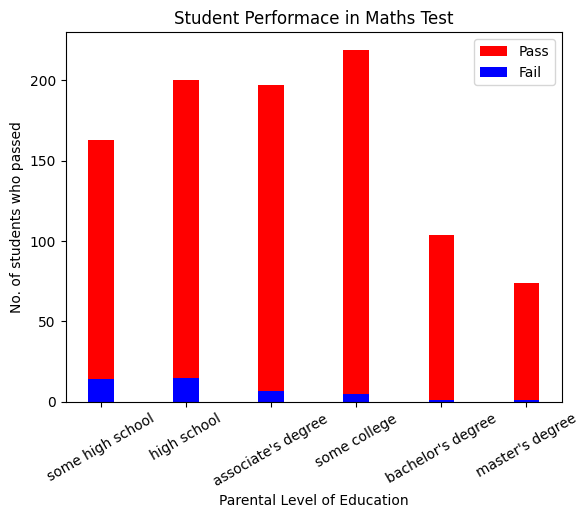

In [16]:
parent_edu = ["some high school", "high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]
X = np.arange (len(parent_edu))
plt.bar (parent_edu, pass_guys, color = "red", width = 0.3, label = "Pass")
plt.bar (parent_edu, fail_guys, color = "blue", width = 0.3, label = "Fail")
plt.xticks (rotation = 30)
plt.ylabel ("No. of students who passed")
plt.xlabel ("Parental Level of Education")
plt.title ("Student Performace in Maths Test")
plt.legend()
plt.show()

In [17]:
df.drop ("math result", axis = 1, inplace = True)
df

,parental level of education,test preparation course,math score,reading score,writing score,average score
0,some college,completed,59,70,78,69.000000
1,associate's degree,none,96,93,87,92.000000
2,some college,none,57,76,77,70.000000
3,some college,none,70,70,63,67.666667
4,associate's degree,none,83,85,86,84.666667
...,...,...,...,...,...,...
995,some college,none,77,77,71,75.000000
996,some college,none,80,66,66,70.666667
997,high school,completed,67,86,86,79.666667
998,high school,none,80,72,62,71.333333


In [18]:
df["Result"] = pd.cut (df["average score"], bins, labels = names, include_lowest = True)
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score,average score,Result
0,some college,completed,59,70,78,69.000000,P
1,associate's degree,none,96,93,87,92.000000,P
2,some college,none,57,76,77,70.000000,P
3,some college,none,70,70,63,67.666667,P
4,associate's degree,none,83,85,86,84.666667,P
5,some high school,none,68,57,54,59.666667,P
6,associate's degree,none,82,83,80,81.666667,P
7,some high school,none,46,61,58,55.000000,P
8,some high school,none,80,75,73,76.000000,P
9,bachelor's degree,completed,57,69,77,67.666667,P


In [19]:
pass_guys = []
x1 = 0
x2 = 0
x3 = 0
x4 = 0 
x5 = 0
x6 = 0
for i in x:
    if (df["parental level of education"][i] == "some high school" and df["Result"][i] == "P"):
        x1 = x1 + 1
pass_guys.append(x1)
for j in x:
    if (df["parental level of education"][j] == "high school" and df["Result"][j] == "P"):
        x2 = x2 + 1
pass_guys.append(x2)
for k in x:
    if (df["parental level of education"][k] == "associate's degree" and df["Result"][k] == "P"):
        x3 = x3 + 1
pass_guys.append(x3)
for l in x:
    if (df["parental level of education"][l] == "some college" and df["Result"][l] == "P"):
        x4 = x4 + 1
pass_guys.append(x4)
for m in x:
    if (df["parental level of education"][m] == "bachelor's degree" and df["Result"][m] == "P"):
        x5 = x5 + 1
pass_guys.append(x5)
for n in x:
    if (df["parental level of education"][n] == "master's degree" and df["Result"][n] == "P"):
        x6 = x6 + 1
pass_guys.append(x6)
print (pass_guys)

[172, 208, 199, 223, 104, 73]


In [20]:
headers = ["Result"]
for name in headers:
    print (name)
    print (df[name].value_counts())
    print (" ")

Result
P    979
F     21
Name: Result, dtype: int64
 


In [21]:
fail_guys = [5,7,5,1,1,2]
fail_guys

[5, 7, 5, 1, 1, 2]

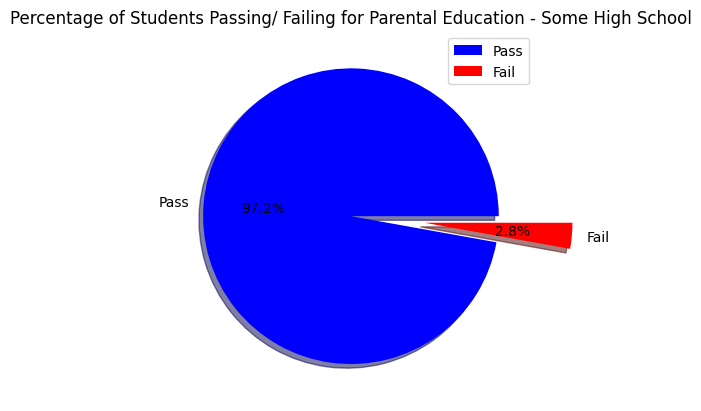

In [22]:
some_high_school = [172, 5]
result = ["Pass", "Fail"]
colors = ["b", "r"]
plt.pie (some_high_school, explode = (0,0.5), labels = result, colors = colors, shadow = "True", autopct = "%1.1f%%")
plt.title ("Percentage of Students Passing/ Failing for Parental Education - Some High School")
plt.legend()
plt.show()

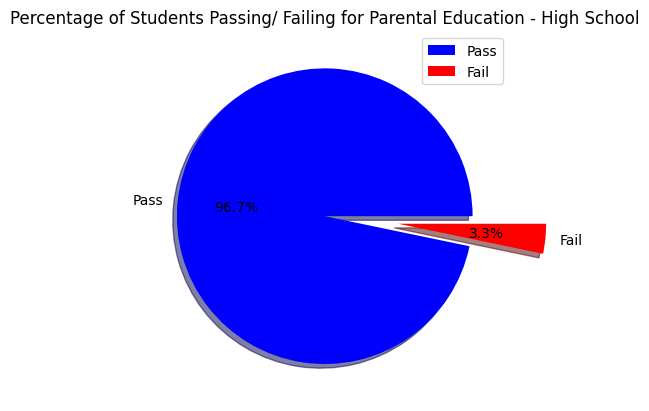

In [23]:
high_school = [pass_guys[1], fail_guys[1]]
plt.pie (high_school, explode = (0,0.5), labels = result, colors = colors, shadow = "True", autopct = "%1.1f%%")
plt.title ("Percentage of Students Passing/ Failing for Parental Education - High School")
plt.legend()
plt.show()

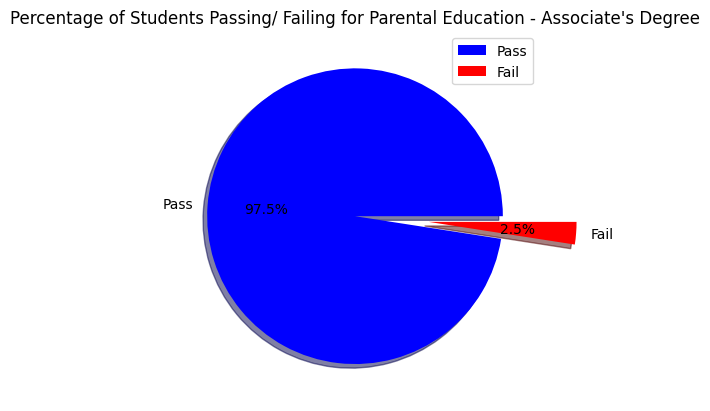

In [24]:
ad = [pass_guys[2], fail_guys[2]]
plt.pie (ad, explode = (0,0.5), labels = result, colors = colors, shadow = "True", autopct = "%1.1f%%")
plt.title ("Percentage of Students Passing/ Failing for Parental Education - Associate's Degree")
plt.legend()
plt.show()

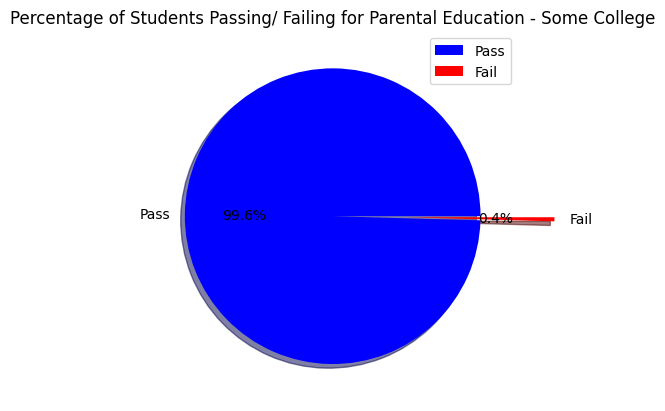

In [25]:
sc = [pass_guys[3], fail_guys[3]]
plt.pie (sc, explode = (0,0.5), labels = result, colors = colors, shadow = "True", autopct = "%1.1f%%")
plt.title ("Percentage of Students Passing/ Failing for Parental Education - Some College")
plt.legend()
plt.show()

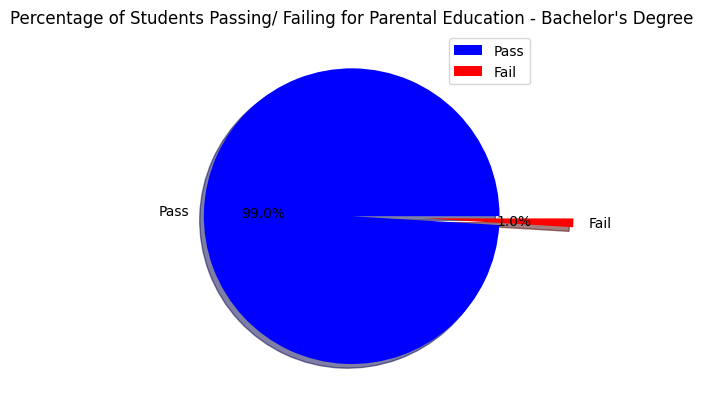

In [26]:
bd = [pass_guys[4], fail_guys[4]]
plt.pie (bd, explode = (0,0.5), labels = result, colors = colors, shadow = "True", autopct = "%1.1f%%")
plt.title ("Percentage of Students Passing/ Failing for Parental Education - Bachelor's Degree")
plt.legend()
plt.show()

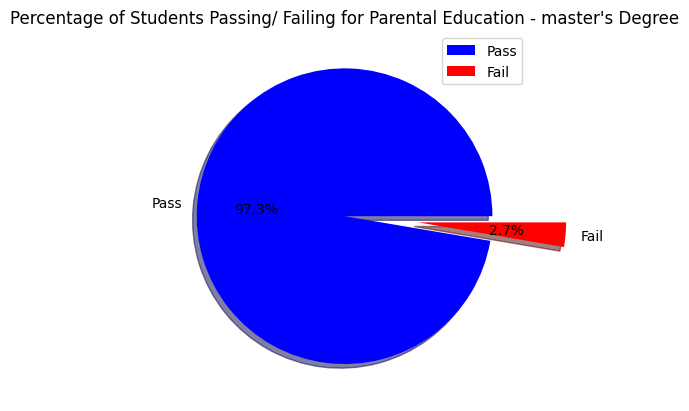

In [27]:
md = [pass_guys[5], fail_guys[5]]
plt.pie (md, explode = (0,0.5), labels = result, colors = colors, shadow = "True", autopct = "%1.1f%%")
plt.title ("Percentage of Students Passing/ Failing for Parental Education - master's Degree")
plt.legend()
plt.show()

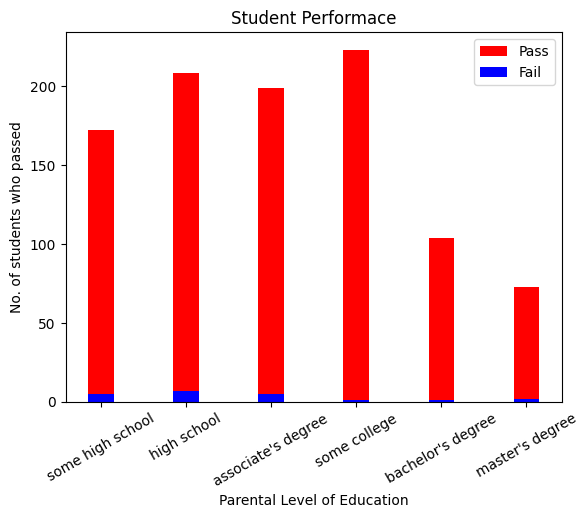

In [28]:
plt.bar (parent_edu, pass_guys, color = "red", width = 0.3, label = "Pass")
plt.bar (parent_edu, fail_guys, color = "blue", width = 0.3, label = "Fail")
plt.xticks (rotation = 30)
plt.ylabel ("No. of students who passed")
plt.xlabel ("Parental Level of Education")
plt.title ("Student Performace")
plt.legend()
plt.show()

In [29]:
df

,parental level of education,test preparation course,math score,reading score,writing score,average score,Result
0,some college,completed,59,70,78,69.000000,P
1,associate's degree,none,96,93,87,92.000000,P
2,some college,none,57,76,77,70.000000,P
3,some college,none,70,70,63,67.666667,P
4,associate's degree,none,83,85,86,84.666667,P
...,...,...,...,...,...,...,...
995,some college,none,77,77,71,75.000000,P
996,some college,none,80,66,66,70.666667,P
997,high school,completed,67,86,86,79.666667,P
998,high school,none,80,72,62,71.333333,P


In [32]:
start = 0
for i in x:
    if (df["test preparation course"][i] == "completed" and df["Result"][i] == "P"):
        start = start + 1
start

343

In [33]:
testprep_yes_pass = start/10
testprep_no_pass = 0
for i in x:
    if (df["test preparation course"][i] == "none" and df["Result"][i] == "P"):
        testprep_no_pass = testprep_no_pass + 1
testprep_no_pass

636

In [34]:
testprep_no_pass = testprep_no_pass/10
testprep_no_pass

63.6

In [35]:
df["Result"].value_counts()

P    979
F     21
Name: Result, dtype: int64

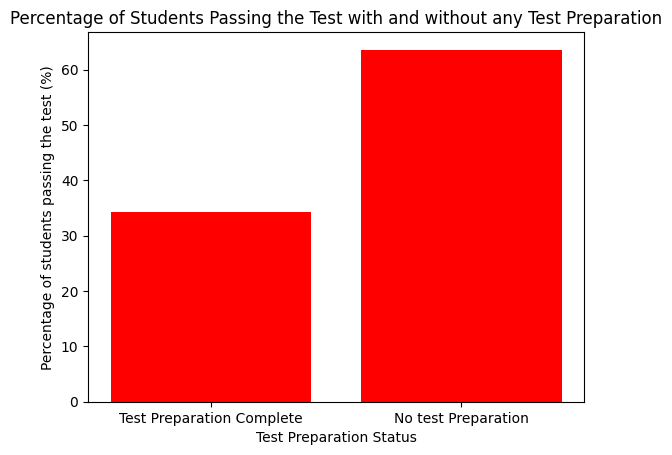

In [37]:
passing_guys = ["Test Preparation Complete", "No test Preparation"]
y = [testprep_yes_pass, testprep_no_pass]
plt.bar (passing_guys, y, color = "red")
plt.xlabel ("Test Preparation Status")
plt.ylabel ("Percentage of students passing the test (%)")
plt.title ("Percentage of Students Passing the Test with and without any Test Preparation")
#plt.grid()
plt.show()

In [40]:
master_test_prep_yes_pass = 0
for student in x:
    if (df["parental level of education"][student] == "master's degree" and df["test preparation course"][student] == "completed"):
        master_test_prep_yes_pass = master_test_prep_yes_pass + 1
master_test_prep_yes_pass

21

In [41]:
df["parental level of education"].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

In [42]:
master_test_prep_no_pass = 0
for student in x:
    if (df["parental level of education"][student] == "master's degree" and df["test preparation course"][student] == "none"):
        master_test_prep_no_pass = master_test_prep_no_pass + 1
master_test_prep_no_pass

54

## Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder as le
encode = le()
df["Result"] = encode.fit_transform (df["Result"])

In [44]:
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score,average score,Result
0,some college,completed,59,70,78,69.000000,1
1,associate's degree,none,96,93,87,92.000000,1
2,some college,none,57,76,77,70.000000,1
3,some college,none,70,70,63,67.666667,1
4,associate's degree,none,83,85,86,84.666667,1
5,some high school,none,68,57,54,59.666667,1
6,associate's degree,none,82,83,80,81.666667,1
7,some high school,none,46,61,58,55.000000,1
8,some high school,none,80,75,73,76.000000,1
9,bachelor's degree,completed,57,69,77,67.666667,1


In [52]:
df.replace ("none", 0, inplace = True)
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score,average score,Result
0,some college,completed,59,70,78,69.000000,1
1,associate's degree,0,96,93,87,92.000000,1
2,some college,0,57,76,77,70.000000,1
3,some college,0,70,70,63,67.666667,1
4,associate's degree,0,83,85,86,84.666667,1
5,some high school,0,68,57,54,59.666667,1
6,associate's degree,0,82,83,80,81.666667,1
7,some high school,0,46,61,58,55.000000,1
8,some high school,0,80,75,73,76.000000,1
9,bachelor's degree,completed,57,69,77,67.666667,1


In [53]:
df.replace ("completed", 1, inplace = True)
df.head(20)

,parental level of education,test preparation course,math score,reading score,writing score,average score,Result
0,some college,1,59,70,78,69.000000,1
1,associate's degree,0,96,93,87,92.000000,1
2,some college,0,57,76,77,70.000000,1
3,some college,0,70,70,63,67.666667,1
4,associate's degree,0,83,85,86,84.666667,1
5,some high school,0,68,57,54,59.666667,1
6,associate's degree,0,82,83,80,81.666667,1
7,some high school,0,46,61,58,55.000000,1
8,some high school,0,80,75,73,76.000000,1
9,bachelor's degree,1,57,69,77,67.666667,1


In [50]:
df

,parental level of education,test preparation course,math score,reading score,writing score,average score,Result
0,some college,completed,59,70,78,69.000000,1
1,associate's degree,none,96,93,87,92.000000,1
2,some college,none,57,76,77,70.000000,1
3,some college,none,70,70,63,67.666667,1
4,associate's degree,none,83,85,86,84.666667,1
...,...,...,...,...,...,...,...
995,some college,none,77,77,71,75.000000,1
996,some college,none,80,66,66,70.666667,1
997,high school,completed,67,86,86,79.666667,1
998,high school,none,80,72,62,71.333333,1


In [56]:
df.drop (["math score", "reading score", "writing score"], axis = 1, inplace = True)

In [57]:
df.head(20)

,parental level of education,test preparation course,average score,Result
0,some college,1,69.000000,1
1,associate's degree,0,92.000000,1
2,some college,0,70.000000,1
3,some college,0,67.666667,1
4,associate's degree,0,84.666667,1
5,some high school,0,59.666667,1
6,associate's degree,0,81.666667,1
7,some high school,0,55.000000,1
8,some high school,0,76.000000,1
9,bachelor's degree,1,67.666667,1


In [58]:
df.replace ("some high school", 0, inplace = True)
df.replace ("high school", 1, inplace = True)
df.replace ("associate's degree", 2, inplace = True)
df.replace ("some college", 3, inplace = True)
df.replace ("bachelor's degree", 4, inplace = True)
df.replace ("master's degree", 0, inplace = True)

In [59]:
df

,parental level of education,test preparation course,average score,Result
0,3,1,69.000000,1
1,2,0,92.000000,1
2,3,0,70.000000,1
3,3,0,67.666667,1
4,2,0,84.666667,1
...,...,...,...,...
995,3,0,75.000000,1
996,3,0,70.666667,1
997,1,1,79.666667,1
998,1,0,71.333333,1


In [80]:
df["Result"].value_counts()

1    979
0     21
Name: Result, dtype: int64

## Train Test Split

In [89]:
from sklearn.preprocessing import MinMaxScaler as ms
x_train, x_test, y_train, y_test = train_test_split (df.drop("Result", axis = 1), df["Result"], test_size = 0.2)

In [62]:
x_train

,parental level of education,test preparation course,average score
745,0,0,75.666667
238,3,1,77.000000
193,0,1,56.000000
755,2,0,74.333333
687,0,0,64.333333
...,...,...,...
96,3,1,79.666667
904,2,0,88.666667
43,3,0,69.666667
214,0,0,79.000000


In [64]:
y_train

745    1
238    1
193    1
755    1
687    1
      ..
96     1
904    1
43     1
214    1
473    1
Name: Result, Length: 800, dtype: int32

## Scaling

In [90]:
scaler = ms()
x_train = scaler.fit_transform (x_train)

In [66]:
x_train

array([[0.        , 0.        , 0.69583333],
       [0.75      , 1.        , 0.7125    ],
       [0.        , 1.        , 0.45      ],
       ...,
       [0.75      , 0.        , 0.62083333],
       [0.        , 0.        , 0.7375    ],
       [0.75      , 1.        , 0.54583333]])

In [91]:
x_test = scaler.transform (x_test)

In [68]:
x_test

array([[0.5       , 0.        , 0.66666667],
       [0.25      , 1.        , 0.7625    ],
       [0.25      , 0.        , 0.7375    ],
       [0.        , 1.        , 0.89583333],
       [0.        , 0.        , 0.6       ],
       [0.5       , 1.        , 0.50833333],
       [0.25      , 0.        , 0.67916667],
       [0.        , 0.        , 0.67916667],
       [0.        , 1.        , 0.75416667],
       [0.5       , 1.        , 0.60833333],
       [0.5       , 1.        , 0.80416667],
       [0.        , 0.        , 0.54583333],
       [0.        , 0.        , 0.95      ],
       [0.        , 1.        , 0.62083333],
       [0.25      , 0.        , 0.55833333],
       [1.        , 1.        , 0.57083333],
       [0.75      , 0.        , 0.4125    ],
       [0.25      , 1.        , 0.49583333],
       [1.        , 0.        , 0.62916667],
       [1.        , 0.        , 0.59583333],
       [0.5       , 0.        , 0.70416667],
       [0.25      , 0.        , 0.47916667],
       [0.

## Undersampling the Dataset due to Imbalance

In [98]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
x_resampled, y_resampled = rus.fit_resample(x_train, y_train)

In [99]:
x_resampled.shape

(30, 3)

## Decision Tree Classifier

In [100]:
clf_ = tree.DecisionTreeClassifier()
clf_.fit (x_resampled, y_resampled)
clf_.score (x_test, y_test)

0.965

## Confusion Matrix

In [101]:
y_predict = clf_.predict (x_test)
import tensorflow as tf
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict)

Text(95.72222222222221, 0.5, 'Truth')

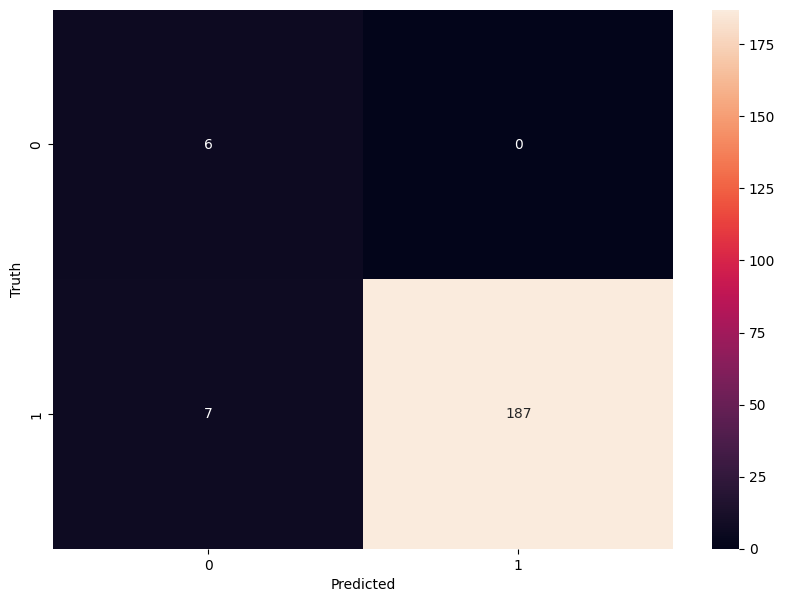

In [102]:
import seaborn as sn
plt.figure (figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")